In [2]:
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
plt.style.use("dark_background")
%matplotlib inline

In [3]:
sys.path.append("../../src")
from models import MLP
from data import gen_rnd_ds
from losses import LinearClassification, SquaredClassification
from block_analysis import *
from derivation import get_hessian_grad_block, block_norm

## TODO: 

### Need LR calibration

Fuse-kun

### Explore depth/width impact


###  Align with other analysis

## Params

In [5]:
# Model
mode = "relu"
bias = False
nlayer = 10
inp_dim = 10 
out_dim = 10
hid_dim = 100

# Data parameters
nsamp = 100
inp_mean = 0
inp_var = 1

# Others
device = 0
lr = 1

In [6]:
model =  MLP(inp_dim, hid_dim, out_dim, nlayer, bias, mode).cuda(device)
ds = gen_rnd_ds(inp_dim, inp_mean, inp_var, 
               out_dim, nsamp, device)

### Squared loss

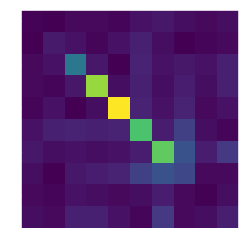

In [7]:
loss_fn = SquaredClassification(out_dim)

model, ds, loss_fn = get_model_ds_loss()
H = block_hessian(model, ds, loss_fn, lr=lr)
plt.imshow(H.abs())

### Linear loss

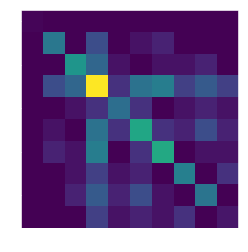

In [8]:
model =  MLP(inp_dim, hid_dim, out_dim, nlayer, bias, mode).cuda(device)
ds = gen_rnd_ds(inp_dim, inp_mean, inp_var, 
               out_dim, nsamp, device)
loss_fn = SquaredClassification(out_dim)

model, ds, loss_fn = get_model_ds_loss()
H = block_hessian(model, ds, loss_fn, lr=0.001)
plt.imshow(H.abs())